# Unsupervised Sentiment Analysis - KMeans Sparse

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

## Preprocessing the data

In [3]:
address = '.\IMDB_Dataset.csv'

In [4]:
imdb = pd.read_csv(address)

In [5]:
imdb.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Data cleaning steps


In [6]:
def text_to_word_list(text):
    text = str(text)
    text = text.lower()
    text = re.sub('<[^<]+?>', '', text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = text.split()
    text = str(text)
    return text

In [8]:
imdb_trimmed = imdb.copy()

In [9]:
#applying the text prep to the review column
imdb_trimmed.review = imdb_trimmed.review.apply(lambda x: text_to_word_list(x))

In [10]:
# creating label for sentiment for evaluation
imdb_trimmed['sentiment'] = imdb_trimmed['sentiment'].map({'positive':1,'negative':0})
imdb_trimmed.head()

,review,sentiment
0,"['one', 'of', 'the', 'other', 'reviewers', 'ha...",1
1,"['a', 'wonderful', 'little', 'production', 'th...",1
2,"['i', 'thought', 'this', 'was', 'a', 'wonderfu...",1
3,"['basically', 'there', 'a', 'family', 'where',...",0
4,"['petter', 'mattei', 'love', 'in', 'the', 'tim...",1


## Modeling - Applying KMeans Clustering 

### Vectorizing, normalizing, and applying TruncatedSVD to reduce the dimensionality

#### Extract features from text using bag of words - CountVectorizer

In [11]:
# Implementing KMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import CountVectorizer

---

## Code modification - Customizing the stopwords

In [49]:
stop_words_cutomized = frozenset(['all', "she'll", "don't", 'being', 'over', 'through', 
'yourselves', 'its', 'before', "he's", "when's", "we've", 'had', 'should',
"he'd", 'to', 'only', "there's", 'those', 'under', 'ours', 'has', 
"haven't", 'do', 'them', 'his', "they'll", 'very', "who's", "they'd", 
'cannot', "you've", 'they', 'not', 'during', 'yourself', 'him', 'nor', 
"we'll", 'did', "they've", 'this', 'she', 'each', "won't", 'where', 
"mustn't", "isn't", "i'll", "why's", 'because', "you'd", 'doing', 'some', 
'up', 'are', 'further', 'ourselves', 'out', 'what', 'for', 'while', 
"wasn't", 'does', "shouldn't", 'above', 'between', 'be', 'we', 'who', 
"you're", 'were', 'here', 'hers', "aren't", 'by', 'both', 'about', 'would', 
'of', 'could', 'against', "i'd", "weren't", "i'm", 'or', "can't", 'own', 
'into', 'whom', 'down', "hadn't", "couldn't", 'your', "doesn't", 'from', 
"how's", 'her', 'their', "it's", 'there', 'been', 'why', 'few', 'too', 
'themselves', 'was', 'until', 'more', 'himself', "where's", "i've", 'with', 
"didn't", "what's", 'but', 'herself', 'than', "here's", 'he', 'me', 
"they're", 'myself', 'these', "hasn't", 'below', 'ought', 'theirs', 'my', 
"wouldn't", "we'd", 'and', 'then', 'is', 'am', 'it', 'an', 'as', 'itself', 
'at', 'have', 'in', 'any', 'if', 'again', 'no', 'that', 'when', 'same', 
'how', 'other', 'which', 'you', "shan't", 'our', 'after', "let's", 'most', 
'such', 'on', "he'll", 'a', 'off', 'i', "she'd", 'yours', "you'll", 'so', 
"we're", "she's", 'the', "that's", 'having', 'once'] + list(stop_words_k1))

In [50]:
%store -r stop_words_k0
%store -r stop_words_k1
%store -r stop_words_k2

In [51]:
# vectorizng the texts
vectorizer = CountVectorizer(stop_words = stop_words_cutomized,max_features=None, min_df=2)
vec = vectorizer.fit_transform(imdb_trimmed.review)

# # normlaizing the vectorized vector
# vec_norm = normalize(vec)
# vec_arr = vec_norm.toarray()

# #performing TruncatedSVD to reduce dimensionality
# vec_TSVD = TruncatedSVD(n_components = 100)
# vec_tranformed = vec_TSVD.fit_transform(vec_arr)

kmeans = KMeans(n_clusters=2, max_iter=3000, algorithm = 'auto')

fitted = kmeans.fit(vec)
prediction = kmeans.predict(vec)

C:\Users\STaine\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [52]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

# evaluate the accuracy of the model
imdb_trimmed['sentiment_pred_vec'] = pd.Series(prediction)
f1 = f1_score(imdb_trimmed['sentiment'],imdb_trimmed['sentiment_pred_vec'],pos_label=1)
acc = accuracy_score(imdb_trimmed['sentiment'],imdb_trimmed['sentiment_pred_vec'])

print("F1 Score : {:.2f} and Accuracy {:.2f}".format(f1,acc))

F1 Score : 0.24 and Accuracy 0.49


#### Extract features from text using bag of words - TfidfVectorizer

In [53]:
# applying the KMeans with tf-idf 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tf_idf = TfidfVectorizer(stop_words = stop_words_cutomized,max_features=None, min_df=2)
vec_tf_idf = vectorizer_tf_idf.fit_transform(imdb_trimmed.review)

kmeans = KMeans(n_clusters=2, max_iter=3000, algorithm = 'auto')

fitted_tf_idf = kmeans.fit(vec_tf_idf)
prediction_tf_idf = kmeans.predict(vec_tf_idf)

C:\Users\STaine\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [54]:
imdb_trimmed['sentiment_pred_tf_idf'] = pd.Series(prediction_tf_idf)
f1 = f1_score(imdb_trimmed['sentiment'],imdb_trimmed['sentiment_pred_tf_idf'],pos_label=1)
acc = accuracy_score(imdb_trimmed['sentiment'],imdb_trimmed['sentiment_pred_tf_idf'])

print("F1 Score : {:.2f} and Accuracy {:.2f}".format(f1,acc))

F1 Score : 0.72 and Accuracy 0.63


---

## Optimizing parameters

### Testing combination of different models - 27 cases

In order to tune hyperparameters, created a function to apply changing parameters and different models. Three parameters that can be changed are max_iter, max_features, min_df=1

In [26]:
def model_param_vec(max_iter=1000, max_features=None, min_df=1):
  vectorizer = CountVectorizer(max_features=max_features, min_df=min_df)
  features = vectorizer.fit_transform(imdb_trimmed.review)
  model = KMeans(n_clusters=2, max_iter=max_iter, algorithm = 'auto')
  model.fit(features)
  pred = model.predict(features)
  return pred, {
    "max_features": max_features,
    "min_df": min_df,
    "max_iter": max_iter,
    "auc": roc_auc_score(imdb_trimmed.sentiment, pred)
  }

In [27]:
from sklearn.metrics import roc_auc_score
def model_param_tf_id(max_iter=1000, max_features=None, min_df=1):
  vectorizer = TfidfVectorizer(max_features=max_features, min_df=min_df)
  features = vectorizer.fit_transform(imdb_trimmed.review)
  model = KMeans(n_clusters=2, max_iter=max_iter, algorithm = 'auto')
  model.fit(features)
  pred = model.predict(features)
  return {
    "max_features": max_features,
    "min_df": min_df,
    "max_iter": max_iter,
    "auc": roc_auc_score(imdb_trimmed.sentiment, pred),
    "acc": accuracy_score(imdb_trimmed.sentiment, pred)
  }

In [28]:
from itertools import product
params = {
  "max_features": [10000, 50000, None],
  "min_df": [1,2,3],
  "max_iter": [1000, 2000, 3000]
}

In [29]:
results_vec = []
for p in product(*params.values()):
  res = model_param_vec(**dict(zip(params.keys(), p)))
  results_vec.append( res )
  print (res)


(array([0, 0, 0, ..., 0, 0, 0]), {'max_features': 10000, 'min_df': 1, 'max_iter': 1000, 'auc': 0.5096116740441541})
(array([0, 0, 0, ..., 0, 0, 0]), {'max_features': 10000, 'min_df': 1, 'max_iter': 2000, 'auc': 0.5096116740441541})
(array([0, 0, 0, ..., 0, 0, 0]), {'max_features': 10000, 'min_df': 1, 'max_iter': 3000, 'auc': 0.5096116740441541})
(array([1, 1, 1, ..., 1, 1, 1]), {'max_features': 10000, 'min_df': 2, 'max_iter': 1000, 'auc': 0.4903883259558459})
(array([0, 0, 0, ..., 0, 0, 0]), {'max_features': 10000, 'min_df': 2, 'max_iter': 2000, 'auc': 0.5096116740441541})
(array([0, 0, 0, ..., 0, 0, 0]), {'max_features': 10000, 'min_df': 2, 'max_iter': 3000, 'auc': 0.5096116740441541})
(array([0, 0, 0, ..., 0, 0, 0]), {'max_features': 10000, 'min_df': 3, 'max_iter': 1000, 'auc': 0.5096116740441541})
(array([1, 1, 1, ..., 1, 1, 1]), {'max_features': 10000, 'min_df': 3, 'max_iter': 2000, 'auc': 0.4903883259558459})
(array([0, 0, 0, ..., 0, 0, 0]), {'max_features': 10000, 'min_df': 3, 'm

In [30]:
results_tf_id = []
for p in product(*params.values()):
  res = model_param_tf_id(**dict(zip(params.keys(), p)))
  results_tf_id.append( res )
  print (res)

{'max_features': 10000, 'min_df': 1, 'max_iter': 1000, 'auc': 0.5045016960321936, 'acc': 0.5042959138396998}
{'max_features': 10000, 'min_df': 1, 'max_iter': 2000, 'auc': 0.5038721476705278, 'acc': 0.5036706869428421}
{'max_features': 10000, 'min_df': 1, 'max_iter': 3000, 'auc': 0.4953949626941126, 'acc': 0.4956032431124198}
{'max_features': 10000, 'min_df': 2, 'max_iter': 1000, 'auc': 0.5049081003326485, 'acc': 0.504699286031221}
{'max_features': 10000, 'min_df': 2, 'max_iter': 2000, 'auc': 0.5048065749183426, 'acc': 0.5045984429833408}
{'max_features': 10000, 'min_df': 2, 'max_iter': 3000, 'auc': 0.49519342508165737, 'acc': 0.4954015570166593}
{'max_features': 10000, 'min_df': 3, 'max_iter': 1000, 'auc': 0.5045036632131972, 'acc': 0.5042959138396998}
{'max_features': 10000, 'min_df': 3, 'max_iter': 2000, 'auc': 0.49628723629572546, 'acc': 0.4964906619337663}
{'max_features': 10000, 'min_df': 3, 'max_iter': 3000, 'auc': 0.4954544857838321, 'acc': 0.495663748941148}
{'max_features': 50

### Performing TfidfVectorizer - NO TruncatedSVD - Optimized parameters of max_features=None and min_df=1

In [36]:
# applying the KMeans with tf-idf _ not performing PCA 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tf_idf = TfidfVectorizer(stop_words = stop_words_cutomized,max_features=None, min_df=2)
vec_tf_idf = vectorizer_tf_idf.fit_transform(imdb_trimmed.review)

kmeans = KMeans(n_clusters=2, max_iter=3000, algorithm = 'auto')

fitted_tf_idf = kmeans.fit(vec_tf_idf)
prediction_tf_idf = kmeans.predict(vec_tf_idf)

C:\Users\STaine\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'don', 'hadn', 'haven', 'mustn', 'shouldn', 'weren', 'won'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

imdb_trimmed['sentiment_pred_tf_idf'] = pd.Series(prediction_tf_idf)
f1 = f1_score(imdb_trimmed['sentiment'],imdb_trimmed['sentiment_pred_tf_idf'],pos_label=1)
acc = accuracy_score(imdb_trimmed['sentiment'],imdb_trimmed['sentiment_pred_tf_idf'])

print("F1 Score : {:.2f} and Accuracy {:.2f}".format(f1,acc))

F1 Score : 0.26 and Accuracy 0.44


### Visulizing the results of TfidfVectorizer with optimal parameters

In [16]:
vec_arr_tf_idf = vec_tf_idf.toarray()

In [17]:
def top_cluster(vec_arr, prediction, number_features):
    labels = np.unique(prediction)
    data = []
    for label in labels:
        idx = np.where(prediction==label)
        xmeans = np.mean(vec_arr[idx], axis = 0)
        meanavg = np.argsort(xmeans)[::-1][:number_features]
        features = vectorizer_tf_idf.get_feature_names()
        best_features = [(features[i], xmeans[i]) for i in meanavg]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        data.append(df)
    return data
words = top_cluster(vec_arr_tf_idf, prediction_tf_idf, 10)

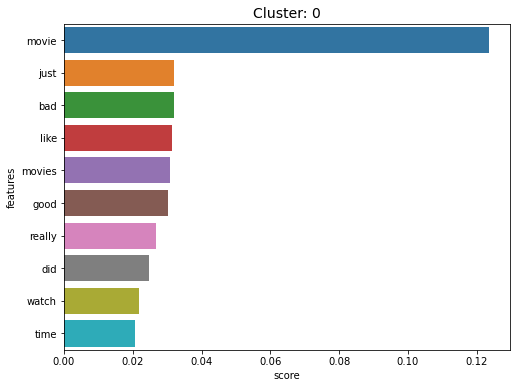

In [18]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = words[0][:15]);
plt.title("Cluster: "+ str(0), fontsize = 14);

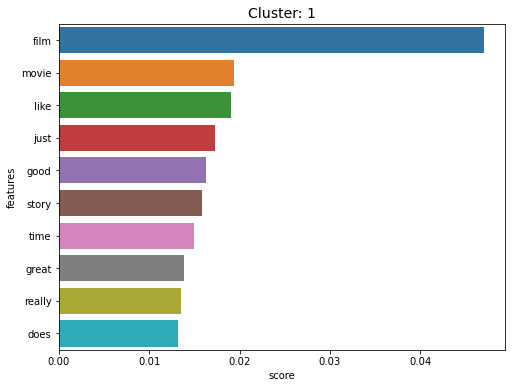

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = words[1][:15]);
plt.title("Cluster: "+ str(1), fontsize = 14);